<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practiced them yet). In this lesson we'll discuss a fundamental method for avoiding overfitting that is commonly referred to as _train/test split_ validation. 

The idea is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [1]:
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [3]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column


In [4]:
print (X.head())
print (X.tail())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.9

In [5]:
print (y.head())
print (y.tail())

   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2
     MEDV
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9


In [6]:
X.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
y.describe(include='all')

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
MEDV    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


In [10]:
X.shape

(506, 13)

In [11]:
y.shape

(506, 1)

In [12]:
print('Number of unique values of column CRIM : ', X['CRIM'].nunique())
print('Number of unique values of column ZN : ', X['ZN'].nunique())
print('Number of unique values of column INDUS : ', X['INDUS'].nunique())
print('Number of unique values of column CHAS : ', X['CHAS'].nunique())
print('Number of unique values of column NOX : ', X['NOX'].nunique())
print('Number of unique values of column RM : ', X['RM'].nunique())
print('Number of unique values of column AGE : ', X['AGE'].nunique())
print('Number of unique values of column DIS : ', X['DIS'].nunique())
print('Number of unique values of column RAD : ', X['RAD'].nunique())
print('Number of unique values of column TAX : ', X['TAX'].nunique())
print('Number of unique values of column PTRATIO : ', X['PTRATIO'].nunique())
print('Number of unique values of column B : ', X['B'].nunique())
print('Number of unique values of column LSTAT : ', X['LSTAT'].nunique())

Number of unique values of column CRIM :  504
Number of unique values of column ZN :  26
Number of unique values of column INDUS :  76
Number of unique values of column CHAS :  2
Number of unique values of column NOX :  81
Number of unique values of column RM :  446
Number of unique values of column AGE :  356
Number of unique values of column DIS :  412
Number of unique values of column RAD :  9
Number of unique values of column TAX :  66
Number of unique values of column PTRATIO :  46
Number of unique values of column B :  357
Number of unique values of column LSTAT :  455


In [13]:
print('Number of unique values of column MEDV : ', y['MEDV'].nunique())

Number of unique values of column MEDV :  229


## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [14]:
# I would like to use the 4 features, CRIM, ZN, DIS and LSTAT as the predictors

In [15]:
import seaborn as sns

In [16]:
feature_cols = ['CRIM', 'ZN', 'DIS', 'LSTAT']

X_data = X[feature_cols]

In [17]:
# Combined the datasets
h_data = pd.concat([X_data, y], axis=1)

In [18]:
h_data.head()

,CRIM,ZN,DIS,LSTAT,MEDV
0,0.00632,18.0,4.0900,4.98,24.0
1,0.02731,0.0,4.9671,9.14,21.6
2,0.02729,0.0,4.9671,4.03,34.7
3,0.03237,0.0,6.0622,2.94,33.4
4,0.06905,0.0,6.0622,5.33,36.2


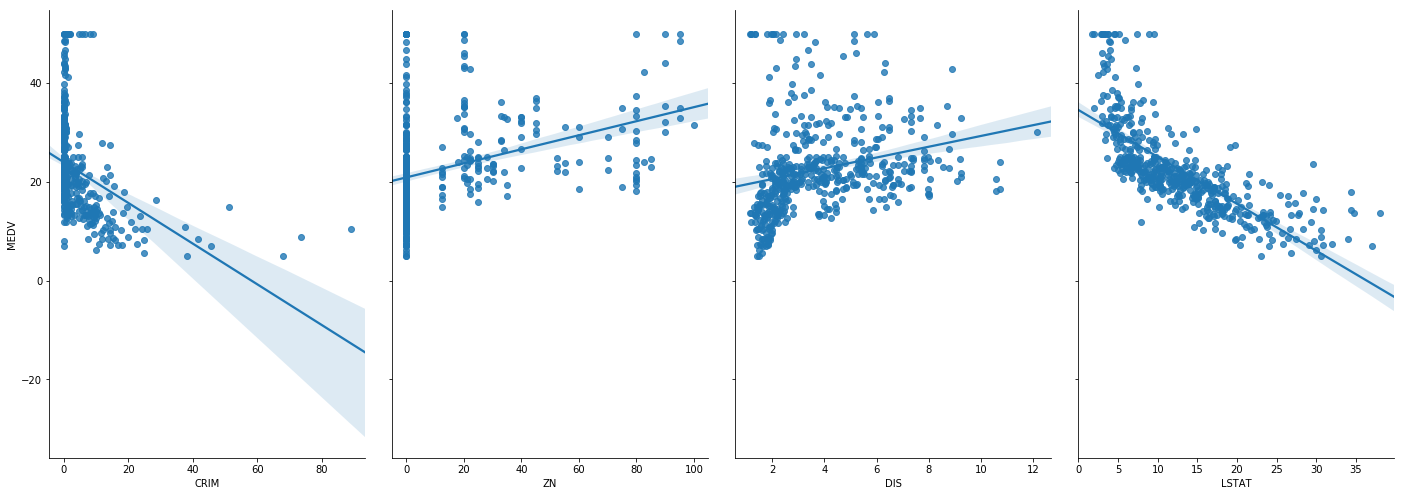

In [19]:
# Visualise the data using 4 different features
sns.pairplot(h_data, x_vars=feature_cols, y_vars='MEDV', size=7, aspect=0.7, kind='reg')

In [20]:
# Using Linear Regression on train_test_split data to predict y with 4 different features

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y, random_state=123)

In [22]:
from sklearn.linear_model import LinearRegression

# Make an instance of a LinearRegression object.
linreg = LinearRegression()
type(linreg)

sklearn.linear_model.base.LinearRegression

In [23]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
print (linreg.intercept_)

[40.15614365]


In [25]:
print (linreg.coef_)

[[-0.10375202  0.09513178 -1.46460513 -1.0042837 ]]


In [26]:
# Each of the coefficients shows the incremental median estimated value of the price of house
# whenever a unit of the feature is increased

In [27]:
# Now, predict the median price using the test data
y_pred = linreg.predict(X_test)

In [28]:
from sklearn import metrics

In [29]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

5.797830425729912

In [30]:
# Let's drop the ZN feature since the coefficient is the lowest

In [31]:
feature_cols = ['CRIM', 'DIS', 'LSTAT']
X_data = X[feature_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y, random_state=123)

linreg.fit(X_train, y_train)

print (linreg.intercept_)

print (linreg.coef_)

y_pred = linreg.predict(X_test)

np.sqrt(metrics.mean_squared_error(y_test, y_pred))

[39.2149073]
[[-0.07903174 -0.8271892  -1.0458676 ]]


6.127912773774389

In [32]:
# The result shows that by dropping the column 'ZN' from our model, the RMSE increases
# Hence, it would be better to retain 'ZN' to be one of the predictors 
# unless this significantly affects the time taking to predict future data


### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [33]:
# Using 70/30 train/test splits, on the selected 4 columns

feature_cols = ['CRIM', 'ZN', 'DIS', 'LSTAT']

X_pred = X[feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X_pred, y, test_size=0.3, random_state=101)   

linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
predictions = linreg.predict(X_test)

In [35]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

6.581099302080013

In [36]:
# Using 90/10 train/test splits, on column LSTAT

X_train, X_test, y_train, y_test = train_test_split(X_pred, y, test_size=0.1, random_state=101)   

linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
predictions = linreg.predict(X_test)

In [38]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

7.558594060730111

In [39]:
# Comparing the above 3 options of the splits, the default 75/25 train/test split derives the best results for this case
# RMSE = 5.797830425729912


### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

feature_cols = ['CRIM', 'ZN', 'DIS', 'LSTAT']

X_pred_price = X[feature_cols]


In [41]:
# Iterate for K from 5 to 10, and obtain the RMSE mean of the multiple folds for each scenario K
compare_scores = {}
for K in range(5,11):

    kf = KFold(n_splits = K, random_state = None, shuffle = False)
    scores = []
    for train_index, test_index in kf.split(X_pred_price):
        X_train, X_test = X_pred_price.iloc[train_index.tolist()], X_pred_price.iloc[test_index.tolist()]
        y_train, y_test = y.iloc[train_index.tolist()], y.iloc[test_index.tolist()]
        linreg.fit(X_train,y_train)
        predictions = linreg.predict(X_test)
        score = np.sqrt(metrics.mean_squared_error(y_test,predictions))
        scores.append([score])
        
    print ('Kfold=', K, ' => RMSE scores : ', scores)    # print each RMSE within each value of K
    scores_mean = np.mean(scores)
    compare_scores.update({K : scores_mean})


Kfold= 5  => RMSE scores :  [[4.948151339616213], [6.013001908762679], [7.802732855273078], [6.349315657700107], [5.145039810433054]]
Kfold= 6  => RMSE scores :  [[4.83131837786158], [5.7719586330080785], [7.3816374238894005], [6.252388267019008], [8.486207104076453], [4.873068603921702]]
Kfold= 7  => RMSE scores :  [[5.115403848432305], [4.254432974482317], [7.542848259120022], [8.284631642358756], [4.480664921552191], [8.485774207035567], [4.480657276940339]]
Kfold= 8  => RMSE scores :  [[4.747883454109683], [4.56845297310016], [6.881737229128016], [7.289025649717189], [6.937472810836167], [7.173650527043333], [5.6610511640634735], [4.423892248931938]]
Kfold= 9  => RMSE scores :  [[4.955382067780983], [4.493198422550782], [6.2475863711619075], [7.404482015777702], [7.795431620523138], [4.891430160026307], [7.472969477388322], [5.775223979857719], [4.415813998364651]]
Kfold= 10  => RMSE scores :  [[5.166200030728144], [4.593759924579846], [4.452135697761091], [7.867815477520168], [7.4

In [42]:
# Print the mean of RMSE for each value of K
compare_scores

{5: 6.051648314357026,
 6: 6.26609640162937,
 7: 6.092059018560214,
 8: 5.960395757116245,
 9: 5.939057568159058,
 10: 5.902476879479453}

In [43]:
# Answer: From the results above, K=10 has the lowest mean RMSE for this dataset, hence seemed to be the optimal.

In [44]:
# Answer: The tradeoffs are the time taken to iterate the folds, hence lengthier run time.

# KNN Practice

In [45]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [46]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [47]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [48]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'

# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES

# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES


In [49]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'


In [50]:
# Checking how many items for each species
iris.species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

In [51]:
# Checking whether there is any null value before assigning the numbers to the species
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [52]:
# Assigning a number to each type of species
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [53]:
print (iris.head(3))
print (iris.tail(3))

   sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   

   species_num  
0            0  
1            0  
2            0  
     sepal_length  sepal_width  petal_length  petal_width         species  \
147           6.5          3.0           5.2          2.0  Iris-virginica   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

     species_num  
147            2  
148            2  
149            2  


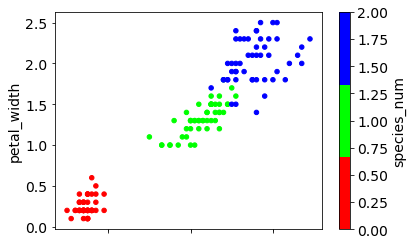

In [54]:
# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES

iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cmap_bold)

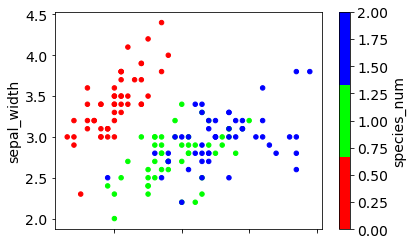

In [55]:
# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES

iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap=cmap_bold)

## KNN Classification of the Iris Dataset

### Create your feature matrix "X"
This will be all species measurements (sepal length, petal width, etc...)

In [56]:
iris_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[iris_cols]
print (X.head())
print (X.tail())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
     sepal_length  sepal_width  petal_length  petal_width
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8


### Create your target vector "y"
This will be the species type.

In [57]:
y = iris.species
print (y.head())
print (y.tail())

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, dtype: object


### Make Use of Train-Test-Split
Split your data in to train and test sets.

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

### Import KNN From `scikit-learn` and Instatiate a Model With One Neighbor

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

### Check the Accuracy
Train your model using the training set then use the test set to determine the accuracy

In [60]:
from sklearn import metrics

In [61]:
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print((metrics.accuracy_score(y_test, y_pred)))


0.8947368421052632


### Create a Model With Five Neighbors. Did it Improve?

In [62]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print((metrics.accuracy_score(y_test, y_pred)))

0.9736842105263158


In [63]:
# Answer: Yes, the accuracy has improved from 89.47% to 97.37% when a model with Five Neighbors was used.

### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

In [64]:
# Iterate KNN from 1 to 100 and calculate the accuracy for each KNN value
scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = float(sum(y_pred == y_test)) / len(y_test)
    scores.append([k, score])

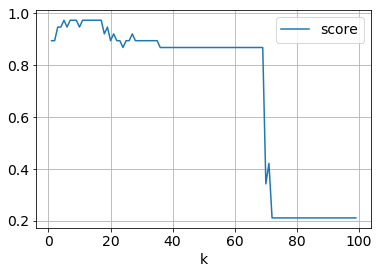

In [65]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score',grid=True);

In [66]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print((metrics.accuracy_score(y_test, y_pred)))

0.9736842105263158


In [67]:
# Answer: The highest accuracy is achieved when k=5 and k is around 15.

### Bonus: According to `scikit-learn` Documentation, What is `knn.predict_proba(X_new)` Going to Do?

In [68]:
# Answer: It returns the probability estimates for the test data X.

## Enrichment
_Everything beyond this point is enrichment and examples using Statsmodels for linear regression._

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [69]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [70]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Wed, 11 Apr 2018   Prob (F-statistic):          1.59e-321
Time:                        20:46:27   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


## Demo: Patsy

In [ ]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [ ]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))